[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Neural_Nets/blob/master/Convolution_neural_nets.ipynb)

# MLP vs. CNN for image classification.

In [1]:
### Configuration
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


# DATA

### Load Data

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print( " x_train:",x_train.shape, "\n",
        "y_train:", y_train.shape,"\n",
        "x_test:", x_test.shape,  "\n",
        "x_test:", y_test.shape )

11493376/11490434 [==============================] - 7s 1us/step
 x_train: (60000, 28, 28) 
 y_train: (60000,) 
 x_test: (10000, 28, 28) 
 x_test: (10000,)


###Plots a random samples from the training dataset.

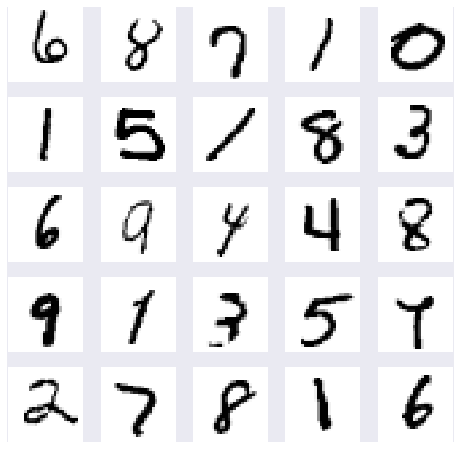

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(imgs,columns=5,rows=5,figsize=(8, 8),subplot_size=(10,10)):
  fig=plt.figure(figsize=figsize)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  for i in range(1, columns*rows+1):
      rand_idx = np.random.randint(len(imgs))
      img = imgs[rand_idx]
      fig.add_subplot(rows, columns, i)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(img)
  plt.show()
  
plot_images(x_train)

### Normalize images between 0 and 1.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= np.max(x_train)
x_test /= np.max(x_test)

print('min:',np.min(x_train),'max:',np.max(x_train))

min: 0.0 max: 1.0


### Convert labes to One-Hot Format.

In [5]:
print("num of classes:",num_classes,"| label:",y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

num of classes: 10 | label: 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MODEL

## Multi-layer Perceptron (MLP)

In [6]:
from functools import reduce

img_rows = x_train.shape[-2]
img_cols =x_train.shape[-1]
num_features = img_rows * img_cols

x_train = x_train.reshape(x_train.shape[0], num_features)
x_test = x_test.reshape(x_test.shape[0], num_features)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [7]:
# Build Model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


##  Convolution Neural Network (CNN)


### Format images to the order requested by Tensflow backgroud API.

In [6]:
img_rows = x_train.shape[-2]
img_cols =x_train.shape[-1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train.shape, x_test.shape

(60000, 28, 28, 1)

### Build Model

In [7]:
model = Sequential()
model.add(Conv2D(filters=64, # Number of Filter / kernel / Neurons
                 kernel_size=(3, 3), 
                 activation='relu', # Activation Function
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                368650    
Total params: 406,218
Trainable params: 406,218
Non-trainable params: 0
_________________________________________________________________


# TRAIN and EVALUATE

### Set the training configurations: loss (objetctive func.), optimization strategy and the evaluation metric.

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
%%time
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.4043 - acc: 0.8789 - val_loss: 0.2259 - val_acc: 0.9326
Epoch 2/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.1655 - acc: 0.9515 - val_loss: 0.1319 - val_acc: 0.9609
Epoch 3/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.1255 - acc: 0.9634 - val_loss: 0.1177 - val_acc: 0.9650
Epoch 4/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.1030 - acc: 0.9694 - val_loss: 0.1033 - val_acc: 0.9682
Epoch 5/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0872 - acc: 0.9742 - val_loss: 0.1029 - val_acc: 0.9697
Epoch 6/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0748 - acc: 0.9780 - val_loss: 0.0899 - val_acc: 0.9730
Epoch 7/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0669 - acc: 0.9799 - val_loss: 0.0907 - val_acc

### Compute Evaluation Metric

In [12]:
y_pred = model.predict(x_test)

# computes 
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.97      0.98      0.98      1010
          4       0.98      0.97      0.97       982
          5       0.97      0.98      0.97       892
          6       0.99      0.97      0.98       958
          7       0.98      0.97      0.97      1028
          8       0.96      0.97      0.97       974
          9       0.96      0.98      0.97      1009

avg / total       0.98      0.98      0.98     10000



# Visualize

Confusion matrix, without normalization
Normalized confusion matrix


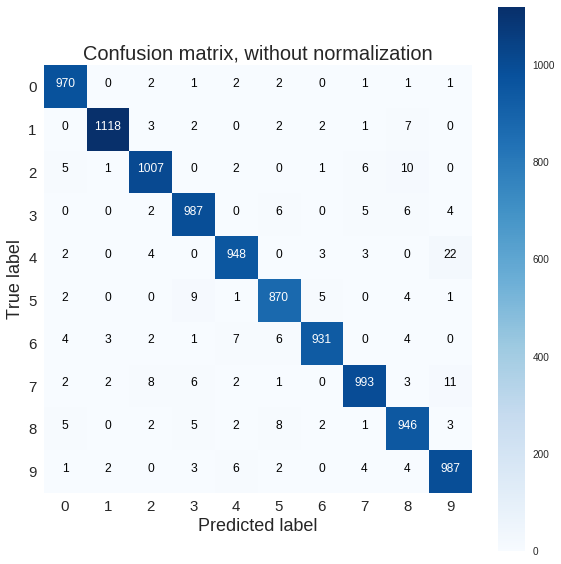

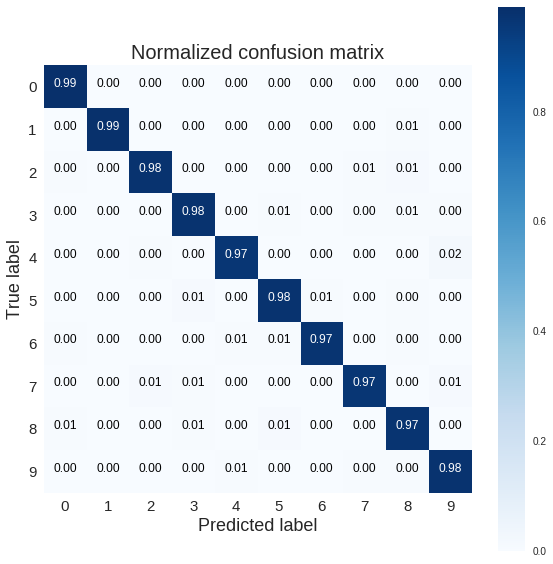

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          fontsize=20):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    http://scikit-learn.org/stable/auto_examples/model_selection/
    plot_confusion_matrix.html (with minor changes)
    
    """
    if (not classes):
        classes = list(map(str,np.arange(len(cnf_matrix))))     
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=fontsize)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=fontsize-5)
    plt.yticks(tick_marks, classes,fontsize=fontsize-5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label',fontsize=fontsize-2)
    plt.xlabel('Predicted label',fontsize=fontsize-2)
    return True

  
# Compute Confusion Matrix  
cnf_matrix = confusion_matrix(y_test_class,y_pred_class)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()